<a href="https://colab.research.google.com/github/sujeet311/Quantuma_Boosting/blob/main/databalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FINALCODE/Data/red_db.csv') #Load the CSV file
df= df.drop('Unnamed: 0',axis=1)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Diabetes_binary'],axis=1)
y = df['Diabetes_binary']
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# summarize the class distribution of the training dataset
counter = Counter(y_train)
print(counter)


Counter({0.0: 136127, 1.0: 24504})


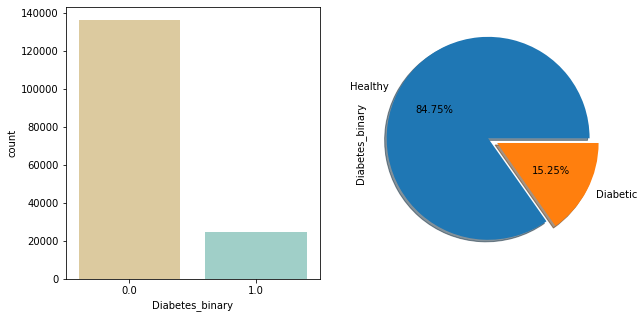

In [ ]:
ex=[0.1,0]
fig1, ax1 = plt.subplots(1,2,figsize=(10,5))
#It shows the count of observations in each categorical bin using bars
sns.countplot(y_train,ax=ax1[0],palette = "BrBG")
#Find the % of diabetic and Healthy person
labels = 'Healthy','Diabetic',
y_train.value_counts().plot.pie(labels=labels, autopct='%0.2f%%',shadow=True,explode=ex)

# Test on Unbalanced dataset

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[56771  1479]
 [ 8945  1648]]
0.8485830077132025
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     58250
         1.0       0.53      0.16      0.24     10593

    accuracy                           0.85     68843
   macro avg       0.70      0.57      0.58     68843
weighted avg       0.81      0.85      0.81     68843



# Test on Undersampled dataset

---

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 136127, 1.0: 24504})
The number of classes after fit Counter({0.0: 30630, 1.0: 24504})


In [ ]:

classifier=LogisticRegression()
classifier.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[31148 27102]
 [ 2941  7652]]
0.5636012375985939
              precision    recall  f1-score   support

         0.0       0.91      0.53      0.67     58250
         1.0       0.22      0.72      0.34     10593

    accuracy                           0.56     68843
   macro avg       0.57      0.63      0.51     68843
weighted avg       0.81      0.56      0.62     68843



# Test on Oversampled dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler

Randomoversample

In [ ]:
os=RandomOverSampler(0.75)
X_train_over,y_train_over=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_over)))

The number of classes before fit Counter({0.0: 136127, 1.0: 24504})
The number of classes after fit Counter({0.0: 136127, 1.0: 102095})


In [ ]:

classifier=LogisticRegression()
classifier.fit(X_train_over,y_train_over)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[44963 13287]
 [ 3515  7078]]
0.7559374228316604
              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84     58250
         1.0       0.35      0.67      0.46     10593

    accuracy                           0.76     68843
   macro avg       0.64      0.72      0.65     68843
weighted avg       0.84      0.76      0.78     68843



Minority Oversampling

---



1.0    194377
0.0    194377
Name: Diabetes_binary, dtype: int64


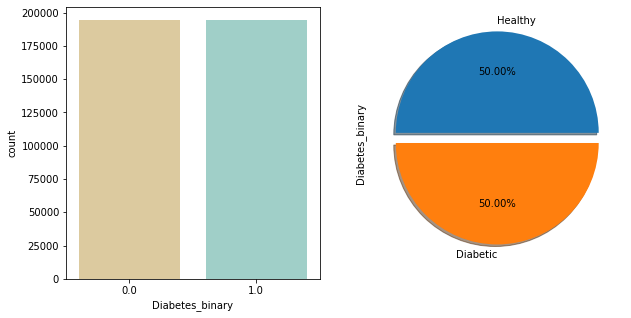

In [ ]:
# over sampling of the dataset to get a balanced dataset
class_0 = df[df['Diabetes_binary'] == 0]
class_1 = df[df['Diabetes_binary'] == 1]

# over sampling of the minority class 1
class_1_over = class_1.sample(len(class_0), replace=True)

# Creating a new dataframe with over sampled class 1 df and class 0 df
df_new = pd.concat([class_1_over, class_0], axis=0)
ex=[0.1,0]
fig1, ax1 = plt.subplots(1,2,figsize=(10,5))
# plotting the new label distribution

print(df_new['Diabetes_binary'].value_counts())

labels = 'Healthy','Diabetic',
sns.countplot(df_new['Diabetes_binary'],ax=ax1[0],palette = "BrBG")
#Find the % of diabetic and Healthy person

df_new['Diabetes_binary'].value_counts().plot.pie(labels=labels, autopct='%0.2f%%',shadow=True,explode=ex)

In [ ]:
df_new.to_csv('/content/drive/MyDrive/FINALCODE/Data/val.csv')

In [ ]:
X = df_new.drop('Diabetes_binary', axis = 1) # features
y = df_new[['Diabetes_binary']] # labels

# splitting the features and labels into train and test with test size = 20% and train size = 80%
X_train_overs, X_test_overs, y_train_overs, y_test_overs = train_test_split(
        X, y, test_size=0.3, random_state=10)

In [ ]:
y_train_overs.value_counts()

Diabetes_binary
0.0                136347
1.0                135780
dtype: int64

In [ ]:
classifier=LogisticRegression()
classifier.fit(X_train_over,y_train_over)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(X_test_overs)
print(confusion_matrix(y_test_overs,y_pred))
print(accuracy_score(y_test_overs,y_pred))
print(classification_report(y_test_overs,y_pred))

[[44875 13155]
 [20272 38325]]
0.7133854081816389
              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73     58030
         1.0       0.74      0.65      0.70     58597

    accuracy                           0.71    116627
   macro avg       0.72      0.71      0.71    116627
weighted avg       0.72      0.71      0.71    116627



In [ ]:
from numpy import savetxt
savetxt('/content/drive/MyDrive/FINALCODE/Data/X_train.csv',X_train_overs, delimiter=',')
savetxt('/content/drive/MyDrive/FINALCODE/Data/y_train.csv',y_train_overs, delimiter=',')
savetxt('/content/drive/MyDrive/FINALCODE/Data/X_test.csv',X_test_overs, delimiter=',')
savetxt('/content/drive/MyDrive/FINALCODE/Data/y_test.csv',y_test_overs, delimiter=',')